## 📝 Python Tutorial - Principal Component Analysis (PCA)



## . Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot 그리기

- 데이터셋 사용을 위해, 다음 링크를 참조
<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 이다.

In [3]:
import seaborn as sb
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#seaborn 라이브러리에서 dataset 불러오기
df = sb.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
#feature값 추출 
df_features = df.loc[:,'bill_length_mm':'body_mass_g']
species = df['species']

df_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [5]:
species

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [6]:
#결측치 확인
df_features.isna().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [7]:
#결측치 제거
df_features = df_features.dropna()

#결측치 제거 확인
df_features.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [8]:
#표준화
scaler = StandardScaler()
Z = scaler.fit_transform(df_features)
print('\n Standardized Data : \n',Z)


 Standardized Data : 
 [[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 ...
 [ 1.18828874 -0.73592307  1.50164406  1.93341896]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968]
 [ 1.09657248 -0.53307343  0.86067049  1.49634578]]


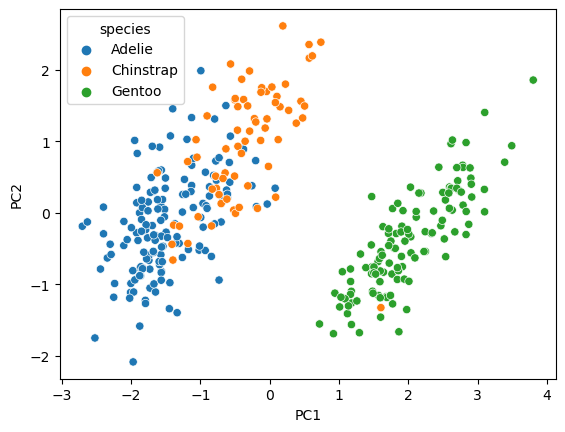

In [9]:
pca = PCA(2)
pca.fit(Z)

#projected
B = pca.transform(Z)

new_df = pd.DataFrame({'PC1':B.T[0],'PC2':B.T[1]}) #or new_df = pd.DataFrame(pca.fit_transform(df_features), columns=['PC1', 'PC2'])

import seaborn as sns

sns.scatterplot(data = new_df, x = 'PC1', y = 'PC2', hue = species)
plt.show()

In [11]:
ratio = pca.explained_variance_ratio_
ratio

array([0.68843878, 0.19312919])

### Scree plot

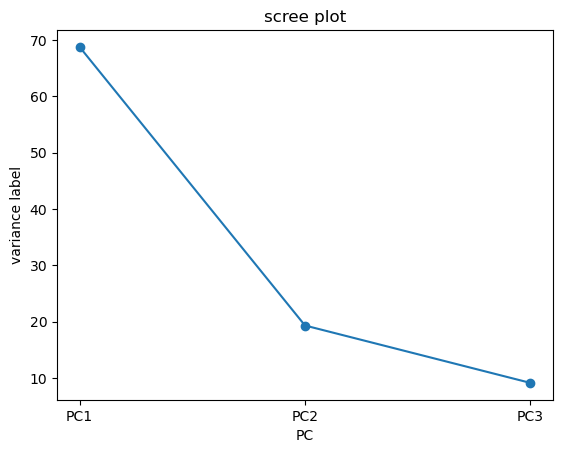

array([0.68843878, 0.19312919, 0.09130898])

In [12]:
pca = PCA(n_components=0.9)
pca.fit_transform(Z)
labels = ['PC1','PC2','PC3']

x = np.arange(pca.n_components_) + 1
plt.plot(x,np.round(pca.explained_variance_ratio_*100,1),'o-')
plt.xlabel('PC')
plt.ylabel('variance label')
plt.title('scree plot')
plt.xticks([1,2,3],labels=labels)
plt.show()

pca.explained_variance_ratio_